In [1]:
import pandas as pd
import numpy as np

pd.Series(np.random.randn(5),index=['a','b','c','d','e'])

a    1.050855
b   -1.240939
c    1.185343
d   -0.218385
e    0.484761
dtype: float64

In [3]:
s=pd.Series(np.random.randn(5))
print(s)

0   -0.616293
1    0.023017
2   -0.419543
3   -2.581123
4    0.401320
dtype: float64


In [4]:
df=pd.DataFrame(s,columns=['Coloumn 1'])
df

,Coloumn 1
0,-0.616293
1,0.023017
2,-0.419543
3,-2.581123
4,0.401320


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('tas.csv')
df.tail()

,tas,date,Country,ISO3,ISO2
1375,24.2959,2015-8,KEN,NaN,NaN
1376,25.2014,2015-9,KEN,NaN,NaN
1377,27.0425,2015-10,KEN,NaN,NaN
1378,25.1404,2015-11,KEN,NaN,NaN
1379,26.5248,2015-12,KEN,NaN,NaN


In [4]:
df=df.iloc[:,:2]
df.head()

,tas,date
0,24.8054,1901-1
1,25.5997,1901-2
2,25.9804,1901-3
3,25.3442,1901-4
4,24.3735,1901-5


In [5]:
df.describe()

,tas
count,1380.000000
mean,24.595133
std,1.085406
min,21.708800
25%,23.808200
50%,24.648900
75%,25.360075
max,27.434100


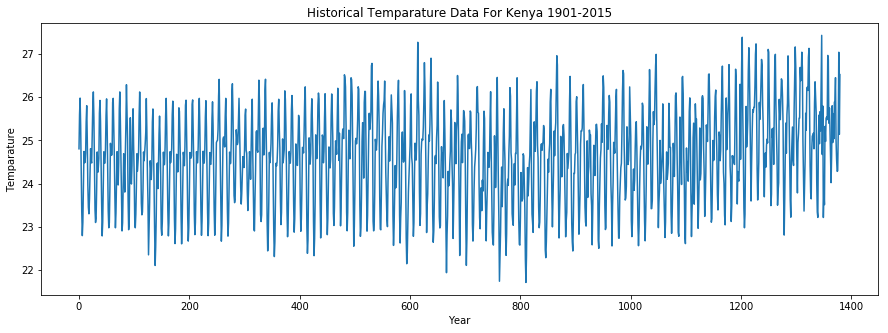

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df['tas'])
plt.title("Historical Temparature Data For Kenya 1901-2015")
plt.xlabel("Year")
plt.ylabel("Temparature")
plt.show()

In [8]:
print(type(df['date'][1]))

<class 'str'>


In [11]:

date=pd.to_datetime(df['date']).dt.year
grouped=df.groupby([date]).mean()
print(grouped)

            tas
date           
1901  24.411350
1902  24.444592
1903  24.492042
1904  24.418350
1905  24.467917
1906  24.463025
1907  24.376833
1908  24.544708
1909  24.281958
1910  24.556475
1911  24.246008
1912  24.013567
1913  24.221383
1914  24.418542
1915  24.347617
1916  24.333525
1917  24.387767
1918  24.396508
1919  24.413800
1920  24.381367
1921  24.513492
1922  24.708750
1923  24.400458
1924  24.868317
1925  24.612592
1926  24.512267
1927  24.486650
1928  24.717725
1929  24.416825
1930  24.188858
...         ...
1986  24.455225
1987  24.990225
1988  24.821233
1989  24.131200
1990  24.384100
1991  24.632492
1992  24.545367
1993  24.432017
1994  24.471825
1995  24.878550
1996  24.809317
1997  24.868492
1998  24.907300
1999  24.794492
2000  24.962808
2001  25.022817
2002  25.543217
2003  25.477308
2004  25.219067
2005  25.137467
2006  25.297383
2007  25.052925
2008  24.963225
2009  25.616983
2010  25.394592
2011  25.354250
2012  25.039083
2013  25.117792
2014  25.449967
2015  25

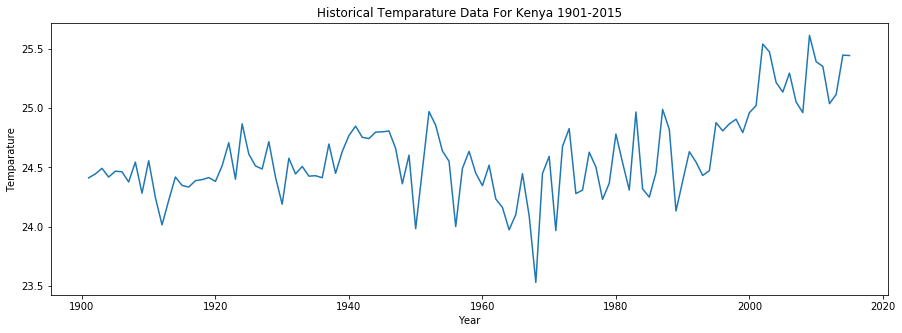

In [12]:
plt.figure(figsize=(15,5))
plt.plot(grouped['tas'])

plt.title("Historical Temparature Data For Kenya 1901-2015")
plt.xlabel("Year")
plt.ylabel("Temparature")
plt.show()

In [18]:
df[date==1971]

,tas,date
840,24.9149,1971-1
841,24.9645,1971-2
842,25.3445,1971-3
843,25.2530,1971-4
844,23.7902,1971-5
845,22.4617,1971-6
846,22.2820,1971-7
847,22.6531,1971-8
848,23.2787,1971-9
849,23.8210,1971-10


In [21]:
#Modelling
from sklearn.linear_model import LinearRegression as LinReg
x=grouped.index.values.reshape(-1,1)
y=grouped['tas'].values
reg=LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print("Accuracy: "+str(reg.score(x,y)))

Accuracy: 0.2584071090850092


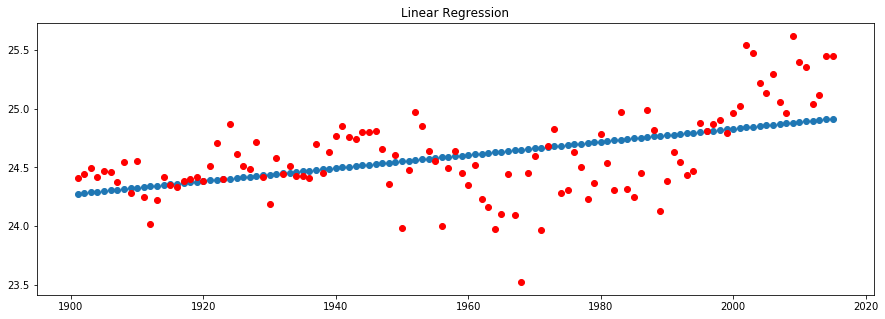

In [23]:
plt.figure(figsize=(15,5))
plt.title("Linear Regression")
plt.scatter(x=x,y=y_preds)
plt.scatter(x=x,y=y,c='r')

In [30]:
reg.predict(2019)

array([24.93654072])